# Análisis Exploratorio de Datos

Este notebook explora y analiza exhaustivamente un conjunto de datos mediante técnicas de análisis exploratorio. El análisis se centra en comprender la naturaleza, distribución y relaciones presentes en los datos, empleando visualizaciones, estadísticas descriptivas y técnicas de manipulación de datos.

### Objetivos:
- Explorar la estructura y contenido del conjunto de datos.
- Identificar patrones, tendencias y posibles relaciones entre variables.
- Realizar limpieza y preparación inicial de los datos para análisis posteriores.

### Contenido:
1. **Exploración inicial:** Revisión de la estructura de datos, dimensiones y tipos de variables.
2. **Análisis univariado:** Estudio de distribuciones, estadísticas descriptivas y visualizaciones de cada variable por separado.
3. **Análisis bivariado:** Exploración de relaciones entre variables mediante gráficos de dispersión, correlaciones y tablas de contingencia.


In [ ]:
# importacion de librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## 1. cargar los datos y obtener información general


In [69]:
# cargar los datos y definir un dataframe
path= '/Users/Maira/Desktop/Proyecto IMT/Proyecto-IMT2200-GRUPO-7/Limpieza/output_data/info_por_estudiante.csv'

df_estudiantes = pd.read_csv(path, sep=',')

In [70]:
df_estudiantes

,MES,COD_PRO_RBD,COD_COM_RBD,RUN_ALUMNO,GENERO_ALUMNO,FECHA_NACIMIENTO_ALUMNO,NOMBRE_COMUNA_ALUMNO,COD_ENSE2,DIAS_ASISTIDOS,ASISTENCIA_PROMEDIO,CRITERIO_SEP,BEN_SEP,PREFERENTE_ALU,PRIORITARIO_ALU,RBD,COD_JOR,PROM_GRAL,SIT_FIN_R
0,8,31,3101,2112520,2,200901,COPIAPÓ,7,14,0.700000,2,Beneficiario SEP,No preferente,prioritario,423,1,6.2,P
1,8,31,3101,3962434,1,200901,COPIAPÓ,7,12,0.600000,0,Beneficiario SEP,Preferente,No prioritario,420,3,4.9,P
2,8,31,3101,4199164,1,200707,COPIAPÓ,7,10,0.500000,2,Beneficiario SEP,No preferente,prioritario,403,1,5.2,P
3,8,31,3101,4218504,2,200812,COPIAPÓ,7,15,0.750000,2,Beneficiario SEP,No preferente,prioritario,430,3,6.6,P
4,8,31,3101,6990009,2,200903,COPIAPÓ,7,15,0.750000,2,Beneficiario SEP,No preferente,prioritario,430,3,6.7,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480123,8,131,13130,24338899,1,201101,SAN MIGUEL,2,21,1.000000,2,Beneficiario SEP,No preferente,prioritario,41794,1,5.3,P
480124,8,131,13130,25757929,2,201110,SAN MIGUEL,2,20,0.952381,0,Beneficiario SEP,Preferente,No prioritario,41794,1,6.3,P
480125,8,131,13130,26254392,1,201106,SAN MIGUEL,2,19,0.904762,0,Beneficiario SEP,Preferente,No prioritario,11906,2,6.3,P
480126,8,131,13130,26305268,2,201112,SAN MIGUEL,2,21,1.000000,0,Beneficiario SEP,Preferente,No prioritario,41794,1,6.6,P


In [71]:
#quitamos columnas inesesarias
columnas_a_eliminar = ['MES', 'RUN_ALUMNO','FECHA_NACIMIENTO_ALUMNO']
df_estudiantes = df_estudiantes.drop(columnas_a_eliminar, axis=1)  # axis=1 indica que se eliminarán columnas, no filas


In [72]:
df_estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480128 entries, 0 to 480127
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   COD_PRO_RBD           480128 non-null  int64  
 1   COD_COM_RBD           480128 non-null  int64  
 2   GENERO_ALUMNO         480128 non-null  int64  
 3   NOMBRE_COMUNA_ALUMNO  480128 non-null  object 
 4   COD_ENSE2             480128 non-null  int64  
 5   DIAS_ASISTIDOS        480128 non-null  int64  
 6   ASISTENCIA_PROMEDIO   480128 non-null  float64
 7   CRITERIO_SEP          480128 non-null  int64  
 8   BEN_SEP               480128 non-null  object 
 9   PREFERENTE_ALU        480128 non-null  object 
 10  PRIORITARIO_ALU       480128 non-null  object 
 11  RBD                   480128 non-null  int64  
 12  COD_JOR               480128 non-null  int64  
 13  PROM_GRAL             480128 non-null  float64
 14  SIT_FIN_R             480128 non-null  object 
dtype


## 2. Estadísticas de resumen

Esta sección presenta un resumen estadístico de los datos, proporcionando métricas clave que describen la distribución, la tendencia central y la dispersión de las variables en el conjunto de datos.

## Aristas a analizar
**Estadisticas Resumen por region** 
- comparación entre copiapó y santiago

**Estadisticas Resumen por comuna** 
- obtener máximos y minimos de asistencia y promedios por por comuna, así como los deciles.

**Estadisticas Resumen por Beneficiario/ No Beneficiario** por region y relación con notas

- identificar comunas más vulnerables para analisar el desempeño de los estudiantes en estas


In [93]:
# Crear un DataFrame auxiliar con el conteo de beneficiarios y no beneficiarios por comuna
conteo_beneficiarios = df_estudiantes.groupby(['COD_COM_RBD', 'BEN_SEP']).size().unstack(fill_value=0)

conteo_beneficiarios.columns = ['No_Beneficiario_SEP', 'Beneficiario_SEP']


conteo_beneficiarios.head()

,No_Beneficiario_SEP,Beneficiario_SEP
COD_COM_RBD,,
3101,17670,3586
3102,2653,155
3103,1601,37
13101,28117,9012
13102,6028,1483


In [94]:
# Calcular la proporción y agregarla como una nueva columna al DataFrame
conteo_beneficiarios['Proporcion_Beneficiarios'] = conteo_beneficiarios['Beneficiario_SEP'] / conteo_beneficiarios['No_Beneficiario_SEP']

conteo_beneficiarios.head()

,No_Beneficiario_SEP,Beneficiario_SEP,Proporcion_Beneficiarios
COD_COM_RBD,,,
3101,17670,3586,0.202943
3102,2653,155,0.058424
3103,1601,37,0.023111
13101,28117,9012,0.320518
13102,6028,1483,0.246019


In [96]:
df_estudiantes[['ASISTENCIA_PROMEDIO','PROM_GRAL','COD_COM_RBD',]]

,ASISTENCIA_PROMEDIO,PROM_GRAL,COD_COM_RBD
0,0.700000,6.2,3101
1,0.600000,4.9,3101
2,0.500000,5.2,3101
3,0.750000,6.6,3101
4,0.750000,6.7,3101
...,...,...,...
480123,1.000000,5.3,13130
480124,0.952381,6.3,13130
480125,0.904762,6.3,13130
480126,1.000000,6.6,13130


In [97]:
estudiantes_mean_comuna = df_estudiantes[['COD_COM_RBD', 'PROM_GRAL', 'ASISTENCIA_PROMEDIO']].groupby(by='COD_COM_RBD',as_index=False).mean()
estudiantes_mean_comuna.head()

,COD_COM_RBD,PROM_GRAL,ASISTENCIA_PROMEDIO
0,3101,5.987434,0.736457
1,3102,6.010221,0.744127
2,3103,5.868254,0.715634
3,13101,5.972205,0.778140
4,13102,5.906883,0.817702


In [ ]:
# Suponiendo que tienes dos DataFrames: df1 y df2
# Realizar la unión por la columna COD_COM_RBD
df_estudiantes_mean_comuna = pd.merge(estudiantes_mean_comuna, conteo_beneficiarios , on='COD_COM_RBD', how='inner')


3. **ASISTENCIA_PROMEDIO (Asistencia Promedio):**

   - El promedio de asistencia es de alrededor de 0.72, lo que indica que, en promedio, se asiste alrededor del 72% del tiempo disponible.
   - Los valores oscilan entre 0.0455 y 1, lo que sugiere que hay una amplia variabilidad en los niveles de asistencia.


4. **PROM_GRAL (Promedio General):**
   - El promedio general está alrededor de 5.78
   - La mayoría de los registros caen entre 5.3 y 6.3


,COD_COM_RBD,PROM_GRAL,ASISTENCIA_PROMEDIO
0,3101,5.987434,0.736457
1,3102,6.010221,0.744127
2,3103,5.868254,0.715634
3,13101,5.972205,0.778140
4,13102,5.906883,0.817702


In [75]:
# Encuentra el índice del valor mínimo y máximo en 'ASISTENCIA_PROMEDIO'
idx_min_asistencia = estudiantes_mean_comuna['ASISTENCIA_PROMEDIO'].idxmin()
idx_max_asistencia = estudiantes_mean_comuna['ASISTENCIA_PROMEDIO'].idxmax()

# Encuentra el índice del valor mínimo y máximo en 'PROM_GRAL'
idx_min_promedio = estudiantes_mean_comuna['PROM_GRAL'].idxmin()
idx_max_promedio = estudiantes_mean_comuna['PROM_GRAL'].idxmax()

# Obtiene las filas completas correspondientes a los índices
fila_min_asistencia = estudiantes_mean_comuna.loc[[idx_min_asistencia]]
fila_max_asistencia = estudiantes_mean_comuna.loc[[idx_max_asistencia]]
fila_min_promedio = estudiantes_mean_comuna.loc[[idx_min_promedio]]
fila_max_promedio = estudiantes_mean_comuna.loc[[idx_max_promedio]]


print("Comuna con la peor asistencia:")
print(fila_min_asistencia)

print("\nComuna con la peor promedio:")
print(fila_min_promedio)

 

print("Comuna con la mejor asistencia:")
print(fila_max_asistencia)

print("\nComuna con el mejor promedio:")
print(fila_max_promedio)


Comunas con la peor asistencia:
   COD_COM_RBD  PROM_GRAL  ASISTENCIA_PROMEDIO
2         3103   5.868254             0.715634

Comunas con la peor promedio:
    COD_COM_RBD  PROM_GRAL  ASISTENCIA_PROMEDIO
17        13115   5.802079             0.873386
Comunas con la mejor asistencia:
    COD_COM_RBD  PROM_GRAL  ASISTENCIA_PROMEDIO
34        13132   5.964231             0.900916

Comunas con el mejor promedio:
   COD_COM_RBD  PROM_GRAL  ASISTENCIA_PROMEDIO
8        13106   6.041759             0.791357


In [77]:

# Calcular la matriz de correlación
matriz_correlacion = estudiantes_mean_comuna.corr()

# Mostrar la matriz de correlación
matriz_correlacion

,COD_COM_RBD,PROM_GRAL,ASISTENCIA_PROMEDIO
COD_COM_RBD,1.000000,-0.085844,0.747347
PROM_GRAL,-0.085844,1.000000,-0.255837
ASISTENCIA_PROMEDIO,0.747347,-0.255837,1.000000


**Correlación entre 'COD_COM_RBD' y 'ASISTENCIA_PROMEDIO':**

Hay una correlación positiva bastante fuerte (0.75), lo que sugiere que existe una relación significativa entre el código de comuna y la asistencia promedio. Es decir, ciertas comunas pueden tener una asistencia promedio más alta que otras.

**Correlación entre 'COD_COM_RBD' y 'PROM_GRAL':**

 (-0.09)

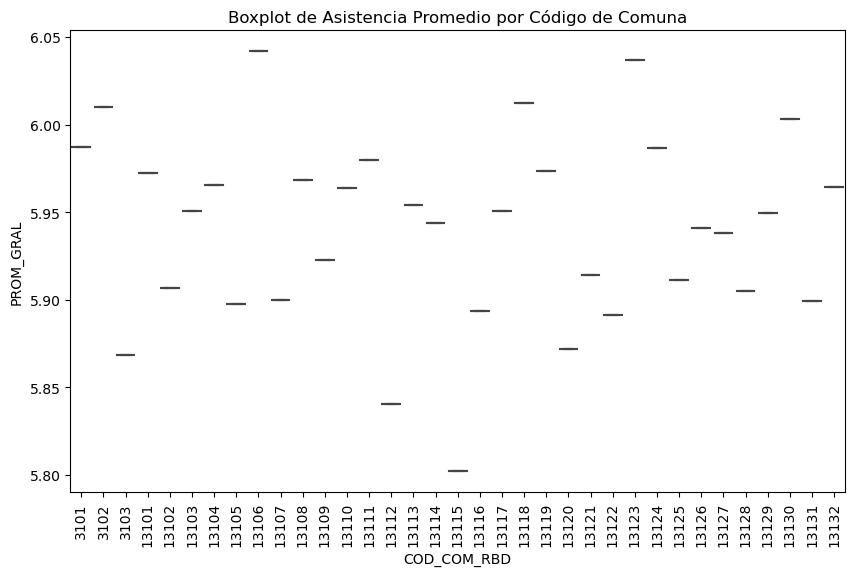

In [86]:
# Crear un boxplot para la asistencia promedio por código de comuna
plt.figure(figsize=(10, 6))
sns.boxplot(x='COD_COM_RBD', y='PROM_GRAL', data=estudiantes_mean_comuna)
plt.xlabel('COD_COM_RBD')
plt.ylabel('PROM_GRAL')
plt.title('Boxplot de Asistencia Promedio por Código de Comuna')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.show()

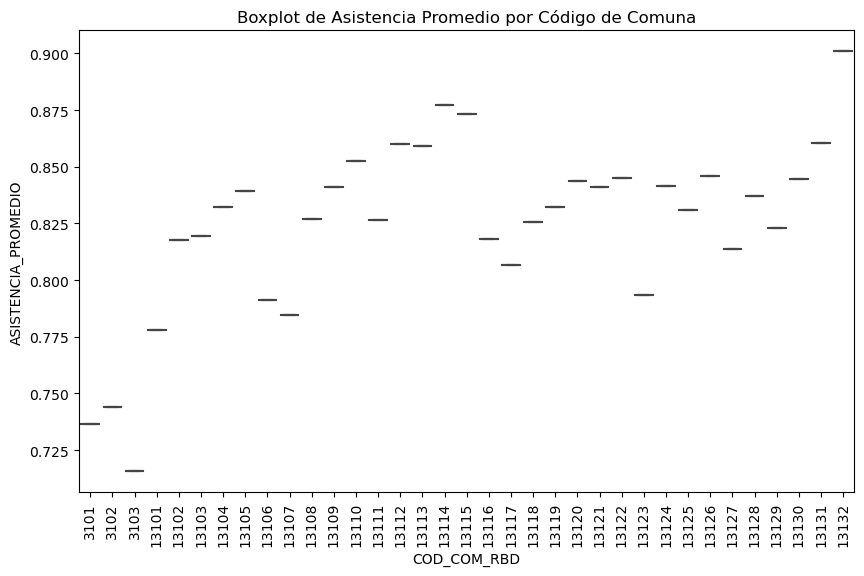

In [84]:
# Crear un boxplot para la asistencia promedio por código de comuna
plt.figure(figsize=(10, 6))
sns.boxplot(x='COD_COM_RBD', y='ASISTENCIA_PROMEDIO', data=estudiantes_mean_comuna)
plt.xlabel('COD_COM_RBD')
plt.ylabel('ASISTENCIA_PROMEDIO')
plt.title('Boxplot de Asistencia Promedio por Código de Comuna')
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x para mayor legibilidad
plt.show()

## 3. Visualización de distribuciones

Esta sección se centra en representar visualmente la distribución de las variables en el conjunto de datos mediante diferentes tipos de gráficos y diagramas.




## 4. Análisis Exploratorio Univariado

Esta sección se dedica al análisis detallado de cada variable por separado, explorando sus características individuales mediante diferentes técnicas estadísticas y visuales.
.


## 4. Análisis Exploratorio Multivariado

Esta sección se enfoca en explorar las relaciones y patrones entre múltiples variables simultáneamente, investigando cómo se comportan en conjunto y cómo se relacionan entre sí.

